<h3>t-критерій Стьюдента для незалежних вибірок</h3>

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані.

In [87]:
import pandas as pd
import seaborn as sns
from math import sqrt

max_heart_rate = pd.read_csv("heart.csv")
max_heart_rate.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [88]:
groups = pd.DataFrame(columns = ['Male', 'Female'])
male = []
female = []

total = 0
while True:
    if (max_heart_rate['sex'][total] == 1 and len(male) < 96):
        male.append(max_heart_rate['thalach'][total])
    if (max_heart_rate['sex'][total] == 0 and len(female) < 96):
        female.append(max_heart_rate['thalach'][total])
    total += 1
    if (len(male) == len(female)):
        break
groups['Male'] = male
groups['Female'] = female

groups.tail()

,Male,Female
91,173,130
92,173,146
93,108,136
94,129,123
95,147,174


2. Побудувати графік, що відображає розкид даних в групах.

[Text(0.5, 0, 'Maximum heart rate')]

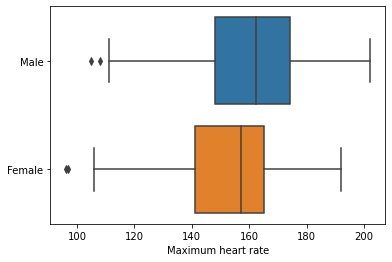

In [89]:
sns.boxplot(data = groups, orient = 'h').set(xlabel = 'Maximum heart rate')

3. Написати функції:
    * для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення тесту  та результат оцінки рівності дисперсій (significant або not significant).

    * для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant). 

In [90]:
def Levene(table):
    keys = table.keys()
    D1 = (table[keys[0]].std())**2
    D2 = (table[keys[1]].std())**2
    F = D1/D2 if D1 > D2 else D2/D1
    df_max = max(len(table[keys[0]]), len(table[keys[1]])) - 1
    df_min = min(len(table[keys[0]]), len(table[keys[1]])) - 1

    Levene_table = pd.read_excel('Levene.xlsx')
    df_index1 = 0
    df_index2 = 0
    for i in range(1,Levene_table.shape[0]-1):
        if (Levene_table.iloc[i,0] <= df_min):
            df_index1 = i
    if (Levene_table.iloc[Levene_table.shape[0]-2,0] < df_min):
        df_index1 = Levene_table.shape[0]-1
        
    for i in range(1,Levene_table.shape[1]-1):
        if (Levene_table.iloc[0,i] <= df_max):
            df_index2 = i
    if (Levene_table.iloc[0,Levene_table.shape[1]-2] < df_max):
        df_index2 = Levene_table.shape[1]-1
    F_table = Levene_table.iloc[df_index1, df_index2]
    
    return F, 'SIGNIFICANT' if F < F_table else 'NON SIGNIFICANT'

In [91]:
def t_test(table, equal):
    keys = table.keys()
    N1 = len(table[keys[0]])
    N2 = len(table[keys[1]])
    M1 = table[keys[0]].mean()
    M2 = table[keys[1]].mean()
    D1 = (table[keys[0]].std())**2
    D2 = (table[keys[1]].std())**2
    if (equal == True):
        t = abs(M1 - M2)/sqrt((D1/N1)+(D2/N2))
    else:
        t_numerator = abs(M1 - M2)
        t_denominator = sqrt((((N1-1)*D1 + (N2-1)*D2)/(N1+N2-2))*(1/N1 + 1/N2))
        t = t_numerator/t_denominator
    df = N1 + N2 - 2
    Student_table = pd.read_excel('Student.xlsx')
    t_table = 0
    i = 0
    while ((i < len(Student_table)-1) and (df > Student_table.iloc[i,0])):
        t_table = Student_table.iloc[i,1]
        i += 1
    if (abs(df-Student_table.iloc[i-1,0]) > abs(df-Student_table.iloc[i,0])):
        t_table = Student_table.iloc[i,1]
    return t, df, 'SIGNIFICANT' if t < t_table else 'NON SIGNIFICANT'

4. Перевірити розбіжність на між групами на даних з п. 1. 

In [92]:
result = Levene(groups)

result

(1.0736683933726126, 'SIGNIFICANT')

In [95]:
if ((result)[1] == 'SIGNIFICANT'):
    std_equal = True
else:
    std_equal = False
    
t_test(groups, std_equal)

(3.4177561999551718, 190, 'NON SIGNIFICANT')